In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib,matplotlib.pyplot as plt
import numpy as np

# 画像の読み込み

opencvでは画像をimreadによりBGR形式のnumpy配列として読み込まれる。

In [3]:
img = cv2.imread('images/rainbow_bridge.jpg')
print(type(img))
print(img)
print(img.shape)

<class 'numpy.ndarray'>
[[[211 164 142]
  [204 157 135]
  [203 156 134]
  ...
  [196 151 100]
  [197 152 101]
  [193 148  97]]

 [[206 160 136]
  [204 158 134]
  [205 159 135]
  ...
  [196 150 102]
  [197 151 103]
  [198 152 104]]

 [[203 158 131]
  [205 160 133]
  [205 160 133]
  ...
  [197 151 103]
  [198 152 105]
  [196 150 103]]

 ...

 [[ 44  54  38]
  [ 43  53  37]
  [ 45  55  39]
  ...
  [ 19  28  25]
  [ 17  26  23]
  [ 18  27  24]]

 [[ 40  53  37]
  [ 39  52  36]
  [ 41  54  38]
  ...
  [ 26  35  32]
  [ 23  32  29]
  [ 20  29  26]]

 [[ 38  51  37]
  [ 38  51  35]
  [ 40  53  37]
  ...
  [ 31  40  37]
  [ 27  36  33]
  [ 26  35  32]]]
(2160, 3840, 3)


BGR形式のためRGB形式で画像を表示するmatplotlibで出力すると元画像とは違う色で出力される。

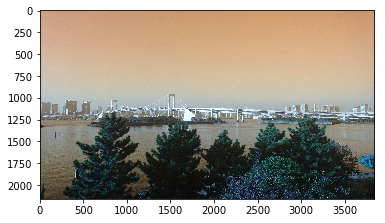

In [4]:
plt.imshow(img)

matplotlibで元画像と同じ色で出力するにはopencvのcvtColor関数を使う。

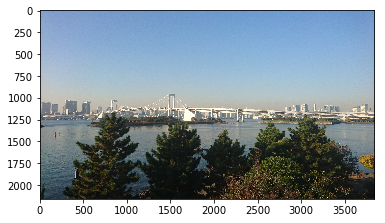

In [5]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

opencvがRGBではなくBGRを使っているのは歴史的背景があるようだ。

[Why does OpenCV use BGR color format ?](https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/)

これによれば昔はBGRの形式が主流だったらしい。

WindowsのCOLORREF型もBGR形式。

# グレースケールへの変換

しばしば画像処理では処理速度の効率化のためグレースケールに変換することがある。

(2160, 3840)


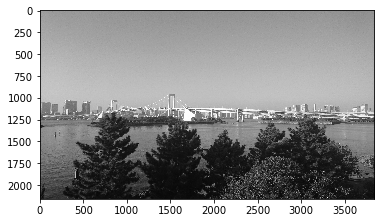

In [25]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gray_img.shape)
plt.imshow(gray_img,cmap='gray')

# 平均色の割り出し

In [7]:
average_color_per_row = np.average(img,axis=0)
average_color = np.average(average_color_per_row,axis=0)

average_color = np.uint(average_color)
print(average_color)

[112 129 139]


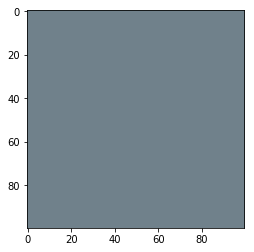

In [14]:
average_color_img = np.array([[average_color]*100]*100,np.uint8) # 100 x 100 pixels
plt.imshow(average_color_img)

# 加工した画像の保存

cv2のimwrite関数を使う。

```python
cv2.imwrite(<path>,<img_source>)
```

BGRに変換してから保存する。

In [11]:
cv2.imwrite("images/processed/img.jpg",cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

True

In [17]:
cv2.imwrite("images/processed/rainbow_bridge_gray_scale.jpg",gray_img)

True

In [1]:
cv2.imwrite("images/processed/average_color_img.jpg",cv2.cvtColor(average_color_img,cv2.COLOR_RGB2BGR))

NameError: name 'cv2' is not defined

In [2]:
cv2.imwrite("images/processed/img.jpg",cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

NameError: name 'cv2' is not defined